<a href="https://colab.research.google.com/github/mandarvshinde/EDA-IPL2024-Aucton-Data/blob/main/ipl2024_auction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale
import matplotlib.ticker as ticker  # Import ticker for formatting

#**Load Data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mandarvshinde/datasets/main/IPL2024_Auction.csv')
# Display the first few rows of the DataFrame
df

,PLAYER,NATIONALITY,TYPE,TEAM,PRICE PAID
0,Daryl Mitchell,Overseas,All-Rounder,Chennai Super Kings,140000000
1,Sameer Rizvi,Indian,Batter,Chennai Super Kings,84000000
2,Shardul Thakur,Indian,All-Rounder,Chennai Super Kings,40000000
3,Mustafizur Rahman,Overseas,Bowler,Chennai Super Kings,20000000
4,Rachin Ravindra,Overseas,All-Rounder,Chennai Super Kings,18000000
...,...,...,...,...,...
67,Travis Head,Overseas,Batter,Sunrisers Hyderabad,68000000
68,Jaydev Unadkat,Indian,Bowler,Sunrisers Hyderabad,16000000
69,Wanindu Hasaranga,Overseas,All-Rounder,Sunrisers Hyderabad,15000000
70,Jhathavedh Subramanyan,Indian,Bowler,Sunrisers Hyderabad,2000000


##**Display Column Names**

In [ ]:
# Check column names
print(df.columns)

Index(['PLAYER', 'NATIONALITY', 'TYPE', 'TEAM', 'PRICE PAID'], dtype='object')


##**Assess data structure and data type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER       72 non-null     object
 1   NATIONALITY  72 non-null     object
 2   TYPE         72 non-null     object
 3   TEAM         72 non-null     object
 4   PRICE PAID   72 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


##**Check for missing values**

In [ ]:
print("\nCheck for missing values:")
print(df.isnull().sum())


Check for missing values:
PLAYER         0
NATIONALITY    0
TYPE           0
TEAM           0
PRICE PAID     0
dtype: int64


##**Descriptive statistics for PRICE PAID (numerical columns)**

In [ ]:
#descriptive statistics for numerical (numeric) columns
df.describe()

,PRICE PAID
count,7.200000e+01
mean,3.200694e+07
std,4.659788e+07
min,2.000000e+06
25%,2.000000e+06
50%,1.250000e+07
75%,4.850000e+07
max,2.475000e+08


##**Nationality Distribution of Players (Indian or Overseas)**

In [ ]:
#Number of values for NATIONALITY (Indian or Overseas)
df['NATIONALITY'].value_counts()

NATIONALITY
Indian      42
Overseas    30
Name: count, dtype: int64

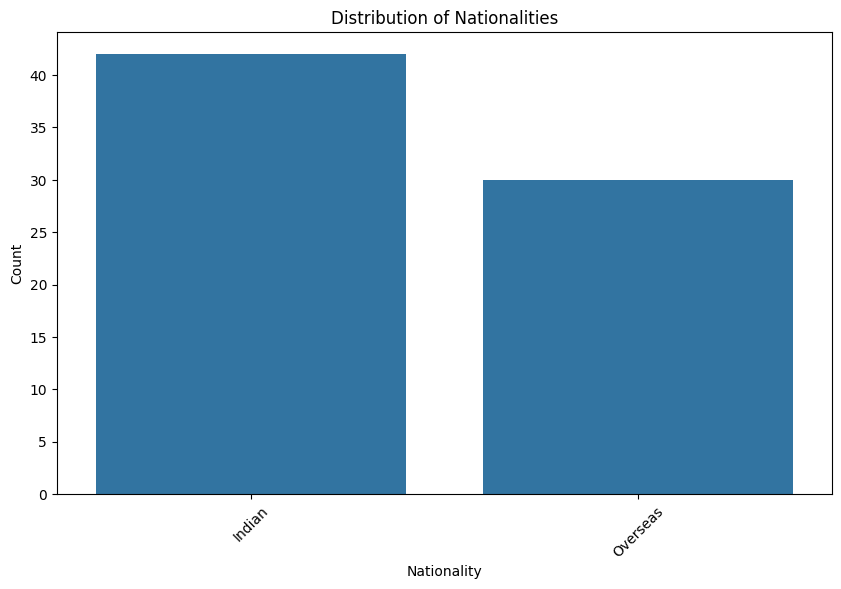

In [ ]:
#Count plot number of values for NATIONALITY (Indian or Overseas)
plt.figure(figsize=(10, 6))
sns.countplot(x='NATIONALITY', data=df, order=df['NATIONALITY'].value_counts().index)
plt.title('Distribution of Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Total Number of players for biught by each team
print("\nTotal players bought in auction by different teams")
df['TEAM'].value_counts()


Total players bought in auction by different teams


TEAM
Kolkata Knight Riders          10
Delhi Capitals                  9
Gujarat Titans                  8
Mumbai Indians                  8
Punjab Kings                    8
Chennai Super Kings             6
Lucknow Super Giants            6
Royal Challengers Bengaluru     6
Sunrisers Hyderabad             6
Rajasthan Royals                5
Name: count, dtype: int64

In [ ]:
print("\nCheck for missing values:")
print(df.isnull().sum())


Check for missing values:
PLAYER         0
NATIONALITY    0
TYPE           0
TEAM           0
PRICE PAID     0
dtype: int64


<ipython-input-135-22865183711d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='PRICE PAID', y='TEAM', data=team_total_amount, palette='viridis')


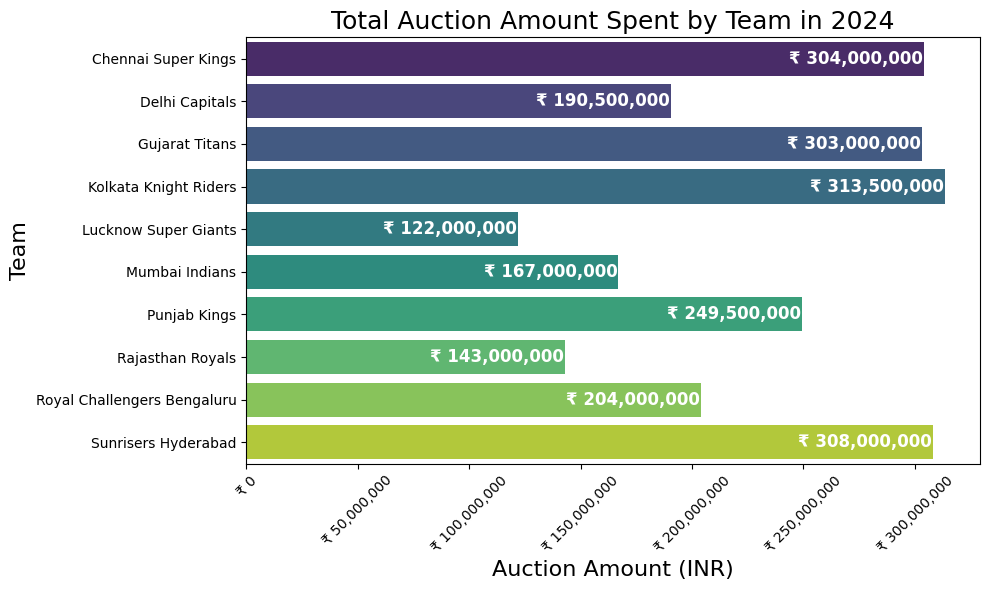

In [ ]:
# Calculate total auction amount per team
team_total_amount = df.groupby('TEAM')['PRICE PAID'].sum().reset_index()

# Set up the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='PRICE PAID', y='TEAM', data=team_total_amount, palette='viridis')

# Formatting the x-axis ticks as INR amounts
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Format x-axis tick labels as INR amounts
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹ {x:,.0f}'))  # Format as INR

# Adding labels and title
plt.xlabel('Auction Amount (INR)', fontsize=16)
plt.ylabel('Team', fontsize=16)
plt.title('Total Auction Amount Spent by Team in 2024', fontsize=18)

# Add annotations (amount values) inside the bars
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x = p.get_width()  # This will be the auction amount
    y = p.get_y() + p.get_height() / 2  # Center the label vertically

    # Adjust the x-coordinate to shift the text more to the left inside the bar
    text_x = x - 500000  # Adjust this value to control the position of the text

    # Format the amount value as INR and add as text inside the bar
    ax.text(text_x, y, f'₹ {x:,.0f}', ha='right', va='center', fontsize=12, color='white', weight='bold')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
df['TYPE'].value_counts()

TYPE
Bowler           26
All-Rounder      25
Batter           13
Wicket-Keeper     8
Name: count, dtype: int64

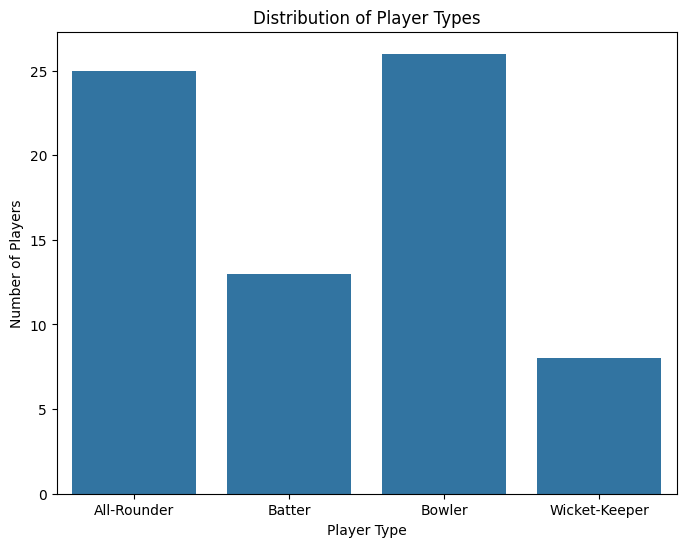

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TYPE', data=df)
plt.title('Distribution of Player Types')
plt.xlabel('Player Type')
plt.ylabel('Number of Players')
plt.show()

In [ ]:
df[['PLAYER','PRICE PAID']]

,PLAYER,PRICE PAID
0,Daryl Mitchell,140000000
1,Sameer Rizvi,84000000
2,Shardul Thakur,40000000
3,Mustafizur Rahman,20000000
4,Rachin Ravindra,18000000
...,...,...
67,Travis Head,68000000
68,Jaydev Unadkat,16000000
69,Wanindu Hasaranga,15000000
70,Jhathavedh Subramanyan,2000000


In [ ]:
# calculate sum values in column
sum_value = df[['PRICE PAID']].sum()

In [ ]:
# Display the sum as a float
sum_float = float(sum_value.iloc[0])
print(sum_float)

2304500000.0


In [ ]:
# Conversion rate: 1 USD = 83.53 INR (as an example)
exchange_rate = 83.53

# Convert INR value to USD
value_in_usd = sum_float / exchange_rate

# Convert USD to billion USD
value_in_billion_usd = value_in_usd / 1e9  # Divide by 1 billion

# Display the value in billion USD
print(f"Total Price PAID value in INR: ₹ {sum_float:.2f} ")
print(f"Total Price PAID value in USD: $ {value_in_usd:.2f} ")
print(f"Total Price PAID value in Billion USD: $ {value_in_billion_usd:.2f} ")

Total Price PAID value in INR: ₹ 2304500000.00 
Total Price PAID value in USD: $ 27588890.22 
Total Price PAID value in Billion USD: $ 0.03 


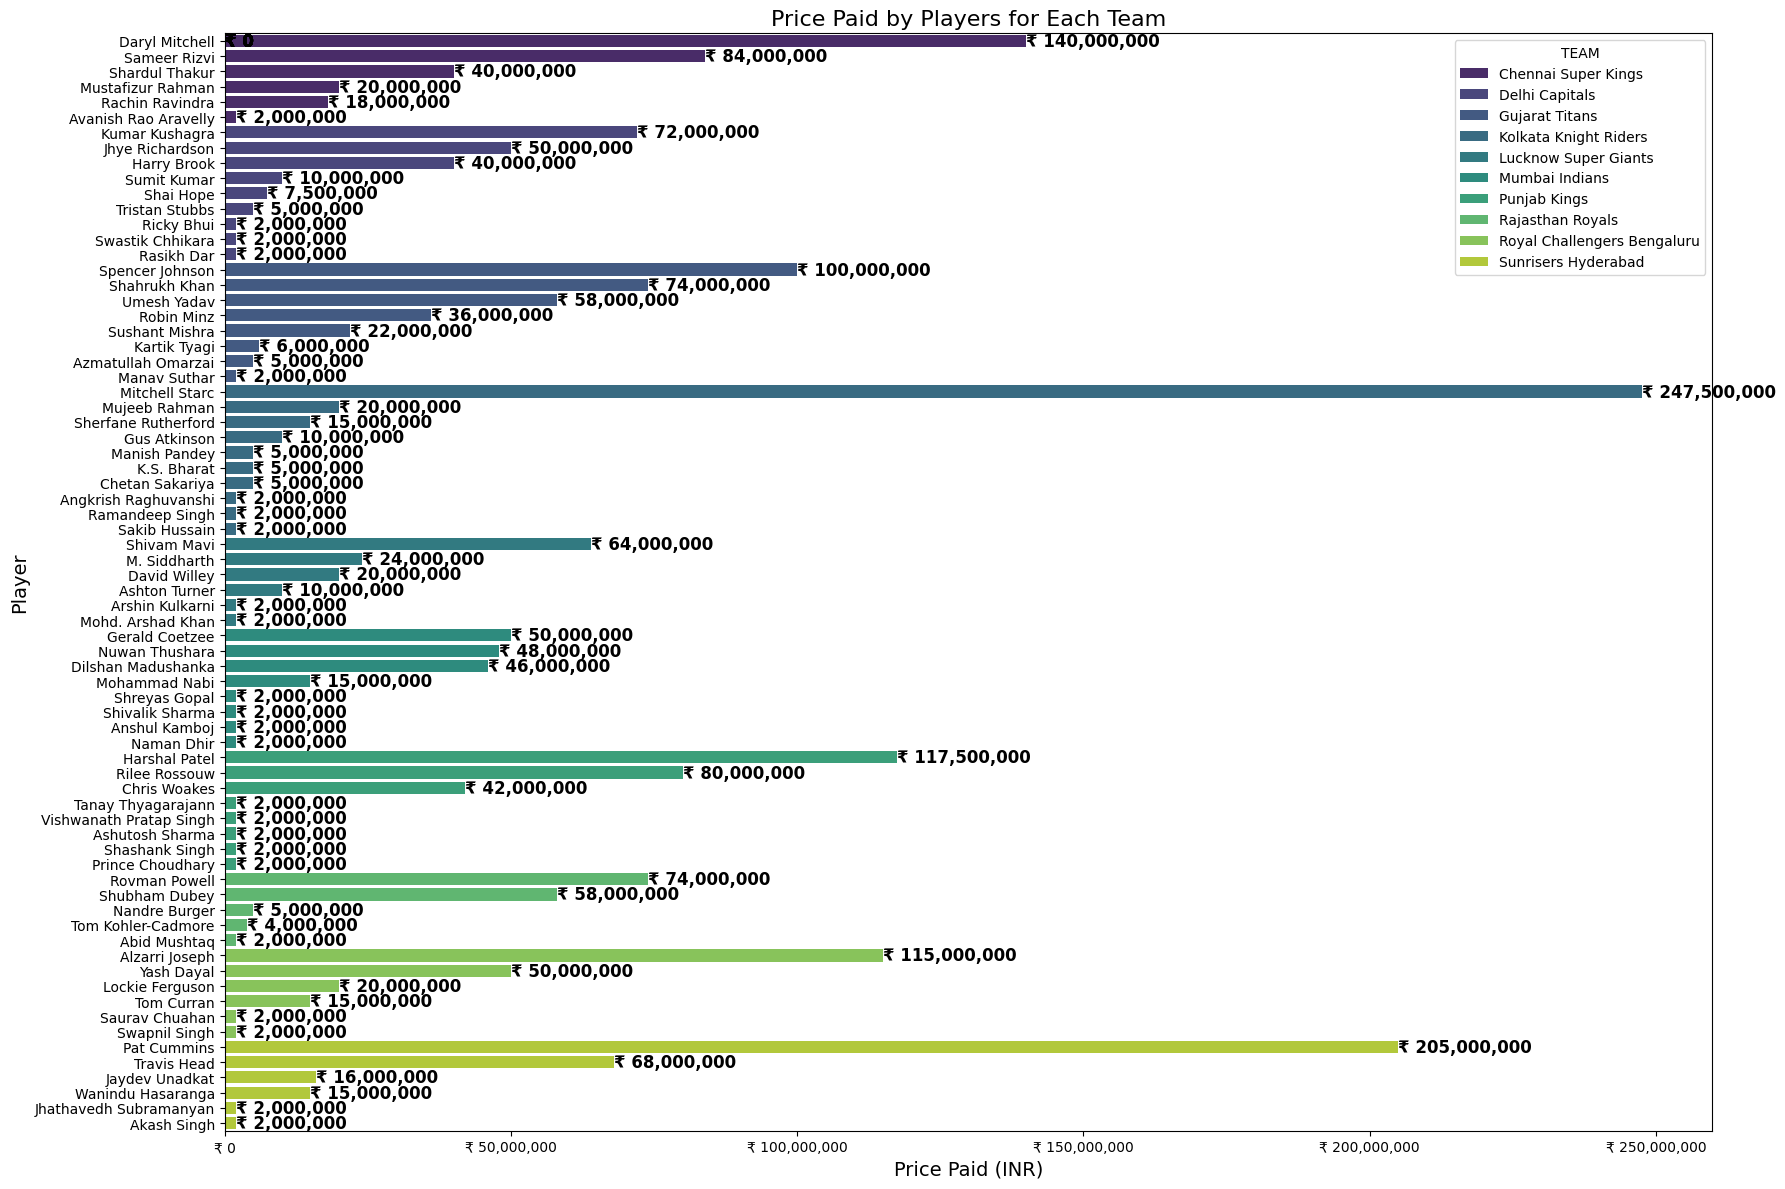

In [ ]:
# Set up the bar plot
plt.figure(figsize=(18, 12))
ax = sns.barplot(x='PRICE PAID', y='PLAYER', hue='TEAM', data=df, palette='viridis')

# Formatting the x-axis ticks as INR amounts
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'₹ {x:,.0f}'))  # Format as INR

# Adding labels and title
plt.xlabel('Price Paid (INR)', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.title('Price Paid by Players for Each Team', fontsize=16)

# Add annotations (amount values) next to each bar
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x = p.get_width()  # This will be the auction amount
    y = p.get_y() + p.get_height() / 2  # Center the label vertically

    # Format the amount value as INR and add as text next to the bar
    plt.text(x, y, f'₹ {x:,.0f}', ha='left', va='center', fontsize=12, color='black', weight='bold')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
# Get unique payment types
payment_types = df['TYPE'].unique()

# Display separate tables for each payment type
for payment_type in payment_types:
    # Filter data for the current payment type
    filtered_df = df[df['TYPE'] == payment_type]

    # Group by TEAM and PLAYER, then calculate total price paid
    grouped_df = filtered_df.groupby(['TEAM', 'PLAYER'])['PRICE PAID'].sum().reset_index()

    # Reset index to display team and player as columns and start from index '1'
    grouped_df = grouped_df.reset_index(drop=True)
    grouped_df.index = grouped_df.index + 1  # Start index from '1'

    # Display the table for the current payment type
    print(f"Price Paid by Team for '{payment_type}' Player:")
    display(grouped_df)
    print()  # Add a blank line for separation

Price Paid by Team for 'All-Rounder' Player:


,TEAM,PLAYER,PRICE PAID
1,Chennai Super Kings,Daryl Mitchell,140000000
2,Chennai Super Kings,Rachin Ravindra,18000000
3,Chennai Super Kings,Shardul Thakur,40000000
4,Delhi Capitals,Sumit Kumar,10000000
5,Gujarat Titans,Azmatullah Omarzai,5000000
6,Gujarat Titans,Shahrukh Khan,74000000
7,Kolkata Knight Riders,Ramandeep Singh,2000000
8,Lucknow Super Giants,Arshin Kulkarni,2000000
9,Lucknow Super Giants,David Willey,20000000
10,Lucknow Super Giants,Mohd. Arshad Khan,2000000



Price Paid by Team for 'Batter' Player:


,TEAM,PLAYER,PRICE PAID
1,Chennai Super Kings,Sameer Rizvi,84000000
2,Delhi Capitals,Harry Brook,40000000
3,Delhi Capitals,Swastik Chhikara,2000000
4,Kolkata Knight Riders,Angkrish Raghuvanshi,2000000
5,Kolkata Knight Riders,Manish Pandey,5000000
6,Kolkata Knight Riders,Sherfane Rutherford,15000000
7,Lucknow Super Giants,Ashton Turner,10000000
8,Punjab Kings,Rilee Rossouw,80000000
9,Punjab Kings,Shashank Singh,2000000
10,Rajasthan Royals,Rovman Powell,74000000



Price Paid by Team for 'Bowler' Player:


,TEAM,PLAYER,PRICE PAID
1,Chennai Super Kings,Mustafizur Rahman,20000000
2,Delhi Capitals,Jhye Richardson,50000000
3,Delhi Capitals,Rasikh Dar,2000000
4,Gujarat Titans,Kartik Tyagi,6000000
5,Gujarat Titans,Manav Suthar,2000000
6,Gujarat Titans,Spencer Johnson,100000000
7,Gujarat Titans,Sushant Mishra,22000000
8,Gujarat Titans,Umesh Yadav,58000000
9,Kolkata Knight Riders,Chetan Sakariya,5000000
10,Kolkata Knight Riders,Gus Atkinson,10000000



Price Paid by Team for 'Wicket-Keeper' Player:


,TEAM,PLAYER,PRICE PAID
1,Chennai Super Kings,Avanish Rao Aravelly,2000000
2,Delhi Capitals,Kumar Kushagra,72000000
3,Delhi Capitals,Ricky Bhui,2000000
4,Delhi Capitals,Shai Hope,7500000
5,Delhi Capitals,Tristan Stubbs,5000000
6,Gujarat Titans,Robin Minz,36000000
7,Kolkata Knight Riders,K.S. Bharat,5000000
8,Rajasthan Royals,Tom Kohler-Cadmore,4000000


In [ ]:
# Get unique teams
teams = df['TEAM'].unique()

# Display separate tables for each team with players sorted by price paid (highest to lowest)
for team in teams:
    # Filter data for the current team
    team_df = df[df['TEAM'] == team]

    # Sort players by price paid (highest to lowest)
    sorted_team_df = team_df.sort_values(by='PRICE PAID', ascending=False)

    # Reset index to start from '1' for display
    sorted_team_df = sorted_team_df.reset_index(drop=True)
    sorted_team_df.index = sorted_team_df.index + 1  # Start index from '1'

    # Display the team name and sorted players in a table format
    print(f"Team: {team}")
    display(sorted_team_df[['PLAYER', 'PRICE PAID']])
    print()  # Add a blank line for separation

Team: Chennai Super Kings


,PLAYER,PRICE PAID
1,Daryl Mitchell,140000000
2,Sameer Rizvi,84000000
3,Shardul Thakur,40000000
4,Mustafizur Rahman,20000000
5,Rachin Ravindra,18000000
6,Avanish Rao Aravelly,2000000



Team: Delhi Capitals


,PLAYER,PRICE PAID
1,Kumar Kushagra,72000000
2,Jhye Richardson,50000000
3,Harry Brook,40000000
4,Sumit Kumar,10000000
5,Shai Hope,7500000
6,Tristan Stubbs,5000000
7,Ricky Bhui,2000000
8,Swastik Chhikara,2000000
9,Rasikh Dar,2000000



Team: Gujarat Titans


,PLAYER,PRICE PAID
1,Spencer Johnson,100000000
2,Shahrukh Khan,74000000
3,Umesh Yadav,58000000
4,Robin Minz,36000000
5,Sushant Mishra,22000000
6,Kartik Tyagi,6000000
7,Azmatullah Omarzai,5000000
8,Manav Suthar,2000000



Team: Kolkata Knight Riders


,PLAYER,PRICE PAID
1,Mitchell Starc,247500000
2,Mujeeb Rahman,20000000
3,Sherfane Rutherford,15000000
4,Gus Atkinson,10000000
5,Manish Pandey,5000000
6,K.S. Bharat,5000000
7,Chetan Sakariya,5000000
8,Angkrish Raghuvanshi,2000000
9,Ramandeep Singh,2000000
10,Sakib Hussain,2000000



Team: Lucknow Super Giants


,PLAYER,PRICE PAID
1,Shivam Mavi,64000000
2,M. Siddharth,24000000
3,David Willey,20000000
4,Ashton Turner,10000000
5,Arshin Kulkarni,2000000
6,Mohd. Arshad Khan,2000000



Team: Mumbai Indians


,PLAYER,PRICE PAID
1,Gerald Coetzee,50000000
2,Nuwan Thushara,48000000
3,Dilshan Madushanka,46000000
4,Mohammad Nabi,15000000
5,Shreyas Gopal,2000000
6,Shivalik Sharma,2000000
7,Anshul Kamboj,2000000
8,Naman Dhir,2000000



Team: Punjab Kings


,PLAYER,PRICE PAID
1,Harshal Patel,117500000
2,Rilee Rossouw,80000000
3,Chris Woakes,42000000
4,Tanay Thyagarajann,2000000
5,Vishwanath Pratap Singh,2000000
6,Ashutosh Sharma,2000000
7,Shashank Singh,2000000
8,Prince Choudhary,2000000



Team: Rajasthan Royals


,PLAYER,PRICE PAID
1,Rovman Powell,74000000
2,Shubham Dubey,58000000
3,Nandre Burger,5000000
4,Tom Kohler-Cadmore,4000000
5,Abid Mushtaq,2000000



Team: Royal Challengers Bengaluru


,PLAYER,PRICE PAID
1,Alzarri Joseph,115000000
2,Yash Dayal,50000000
3,Lockie Ferguson,20000000
4,Tom Curran,15000000
5,Saurav Chuahan,2000000
6,Swapnil Singh,2000000



Team: Sunrisers Hyderabad


,PLAYER,PRICE PAID
1,Pat Cummins,205000000
2,Travis Head,68000000
3,Jaydev Unadkat,16000000
4,Wanindu Hasaranga,15000000
5,Jhathavedh Subramanyan,2000000
6,Akash Singh,2000000
